In [ ]:
# Copyright 2023 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Vertex SDK Version

This version is just calling Vertex SDK for prediction endpoint, if you would like to view a version using REST APIs, see here: [go/gen-ai-image-colab](http://go/gen-ai-image-colab)

**Please make a copy of this notebook to run it for Demos.**

* [Vertex PaLM API User Guide](https://docs.google.com/document/d/1ruSHqTspc7alqfWEpdJrQHSDSn962NNcuzC8kCQN5Q8/edit)
* [Vertex Image Generation Fishfooding session guide](http://go/IG-fishfooding)

| | | |
|----------|-------------|-------------|
| Author(s)   | Jose Brache (jbrache@) | Graeme Merrall (gmerrall@)
| Last updated | 08/02/2023||

<br/>

| Release Notes||
|----------|-------------|
| Date   | Description |
| 08/02/2023 | Added additional examples (gmerrall@)|
| 08/01/2023 | Updated model name to `imagegeneration` |
| 07/18/2023 | Updated with Vertex Client instead of REST API calls |
| 05/30/2023 | Updated with publisher image endpoints |
| 04/14/2023 | Initial version |

# Package Installation

In [ ]:
! pip install gradio opencv-python --quiet

In [ ]:
# Install Vertex AI LLM SDK
! pip install "google-cloud-aiplatform>=1.25.0"

---

#### ⚠️ Do not forget to click the "RESTART RUNTIME" button above.

---

# Authenticating

In [ ]:
import requests

from google.cloud import aiplatform
from google.protobuf import json_format
from google.protobuf.struct_pb2 import Value


PROJECT_ID = "MY_PROJECT"  # @param {type:"string"}
REGION = "us-central1"  # @param {type:"string"}
MODEL_NAME = "text-bison@001" # @param {type:"string"}
IMAGE_MODEL_NAME = "imagegeneration" # @param {type:"string"}


# Using the updated publisher endpoint, updated May '23
ENDPOINT_URL = f'projects/{PROJECT_ID}/locations/{REGION}/publishers/google/models/{IMAGE_MODEL_NAME}'
# Generate images via API
def image_gen_model(
    prompt: str,
    sampleImageSize: int,
    sampleCount: int,
    seed=None,
):
  # The AI Platform services require regional API endpoints.
  api_endpoint = f'{REGION}-aiplatform.googleapis.com'
  client_options = {"api_endpoint": api_endpoint}

  # Initialize client that will be used to create and send requests.
  # This client only needs to be created once, and can be reused for multiple requests.
  client = aiplatform.gapic.PredictionServiceClient(
      client_options=client_options
  )
  instance_dict = {"prompt": prompt}
  instance = json_format.ParseDict(instance_dict, Value())
  instances = [instance]

  if seed==None:
    parameters_dict = {
        "sampleImageSize": sampleImageSize,
        "sampleCount": sampleCount,
    }
  else:
    parameters_dict = {
        "sampleImageSize": sampleImageSize,
        "sampleCount": sampleCount,
        "seed": seed
    }

  parameters = json_format.ParseDict(parameters_dict, Value())
  #endpoint = client.endpoint_path(project=project, location=location, endpoint=endpoint_id)
  endpoint = ENDPOINT_URL
  response = client.predict(
      endpoint=endpoint, instances=instances, parameters=parameters
  )

  predictions = response.predictions
  return predictions

In [ ]:
#@title Click `Show code` in the code cell (Don't forget to run this cell). { display-mode: "form" }

sampleImageSize = '1024' #@param {type:"string"}
sampleCount = 6 #@param {type:"integer"}
prompt = 'stock photo of an old european woman wearing a hat. black & white' #@param {type:"string"}

# Advanced option, try different the seed numbers
# any random integer number range: (0, 2147483647)
seed = None #@param {type:"raw"}

print('sampleImageSize:', sampleImageSize)
print('sampleCount:', sampleCount)
print('prompt', prompt)
print('seed', seed)
# Use & provide a seed, if possible, so that we can reproduce the results when needed.
try:
  predictions = image_gen_model(prompt, sampleImageSize, sampleCount, seed)

except Exception as e:
  print(e)
  print("An error occured calling the API.")
  print("1. Check if response was not blocked based on policy violation, check if the UI behaves the same way...")
  print("2. Try a different prompt to see if that was the problem.\n")

sampleImageSize: 1024
sampleCount: 6
prompt stock photo of an old european woman wearing a hat. black & white
seed None


## Display Images

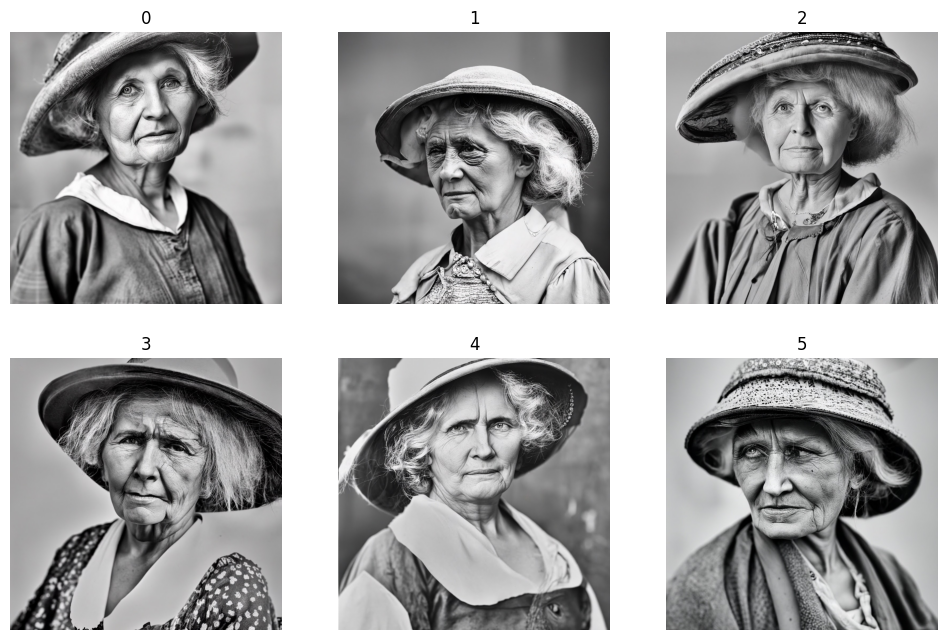

In [ ]:
#import libraries
import base64
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt

def display_images_grid(predictions):
  # create figure
  fig = plt.figure(figsize=(12, 12))

  pics = len(predictions)

  # setting values to rows and column variables
  columns = 3
  # rows = 2
  rows = math.ceil(pics / columns) + 1

  for index, result in enumerate(predictions):
    img_str = result._pb['bytesBase64Encoded'].SerializeToString()
    img_b64 = img_str[4:]
    im_bytes = base64.b64decode(img_b64)
    im_arr = np.frombuffer(im_bytes, dtype=np.uint8)  # one-dim Numpy array
    img = cv2.imdecode(im_arr, flags=cv2.IMREAD_COLOR)

    # Adds a subplot at the x position
    fig.add_subplot(rows, columns, index + 1)

    # showing image
    # Converting from BGR to RGB
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(str(index))

display_images_grid(predictions)

# Image generation and editing

## Text to Image Generation

In [ ]:
#@title Click `Show code` in the code cell (Don't forget to run this cell). { display-mode: "form" }

sampleImageSize = '1024' #@param {type:"string"}
sampleCount = 2 #@param {type:"integer"}
prompt = 'A raccoon wearing formal clothes, wearing a top hat. Oil painting in the style of Vincent Van Gogh.' #@param {type:"string"}

# Advanced option, try different the seed numbers
# any random integer number range: (0, 2147483647)
seed = None #@param {type:"raw"}

print('sampleImageSize:', sampleImageSize)
print('sampleCount:', sampleCount)
print('prompt', prompt)
print('seed', seed)
# Use & provide a seed, if possible, so that we can reproduce the results when needed.
try:
  predictions = image_gen_model(prompt, sampleImageSize, sampleCount, seed)

except Exception as e:
  print(e)
  print("An error occured calling the API.")
  print("1. Check if response was not blocked based on policy violation, check if the UI behaves the same way...")
  print("2. Try a different prompt to see if that was the problem.\n")


display_images_grid(predictions)

## Image Editing, mask free

In [ ]:
!gsutil cp gs://graeme-dropbox/cake_1.jpeg .

Copying gs://graeme-dropbox/cake_1.jpeg...
- [1 files][182.3 KiB/182.3 KiB]                                                
Operation completed over 1 objects/182.3 KiB.                                    


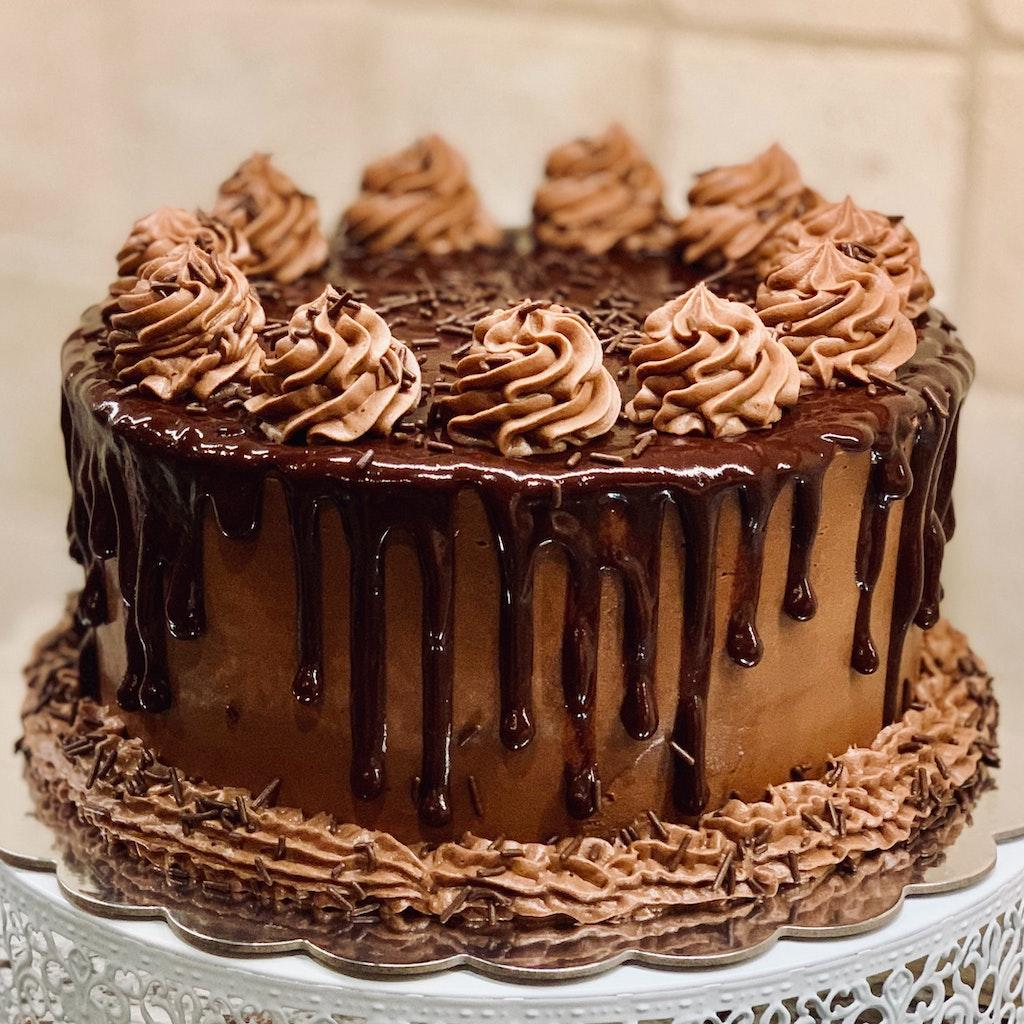

In [ ]:
from IPython.display import Image
filename = 'cake_1.jpeg'

Image(filename=filename, width = 300, height=300)

In [ ]:
# Import the base64 encoding library.
import base64

# Pass the image data to an encoding function.
def encode_image(image):
    with open(image, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read())
    return encoded_string
base64_encoded_image = encode_image(filename)

# method for image editing
def image_gen_model_editing(
    prompt: str,
    sampleImageSize: int,
    sampleCount: int,
    base64_encoded_image,
    base64_encoded_mask=None,
    seed=None,
):
  # The AI Platform services require regional API endpoints.
  api_endpoint = f'{REGION}-aiplatform.googleapis.com'
  client_options = {"api_endpoint": api_endpoint}

  # Initialize client that will be used to create and send requests.
  # This client only needs to be created once, and can be reused for multiple requests.
  client = aiplatform.gapic.PredictionServiceClient(
      client_options=client_options
  )

  if base64_encoded_mask == None:
    instance_dict = {
        "prompt": prompt,
        "image": {"bytesBase64Encoded": base64_encoded_image}
        }
  else:
    instance_dict = {
        "prompt": prompt,
        "image": {"bytesBase64Encoded": base64_encoded_image},
        "mask": {"image": {"bytesBase64Encoded": base64_encoded_mask}}
        }
  instance = json_format.ParseDict(instance_dict, Value())
  instances = [instance]

  if seed==None:
    parameters_dict = {
        "sampleImageSize": sampleImageSize,
        "sampleCount": sampleCount,
    }
  else:
    parameters_dict = {
        "sampleImageSize": sampleImageSize,
        "sampleCount": sampleCount,
        "seed": seed
    }

  parameters = json_format.ParseDict(parameters_dict, Value())
  #endpoint = client.endpoint_path(project=project, location=location, endpoint=endpoint_id)
  endpoint = ENDPOINT_URL
  response = client.predict(
      endpoint=endpoint, instances=instances, parameters=parameters
  )

  predictions = response.predictions
  return predictions

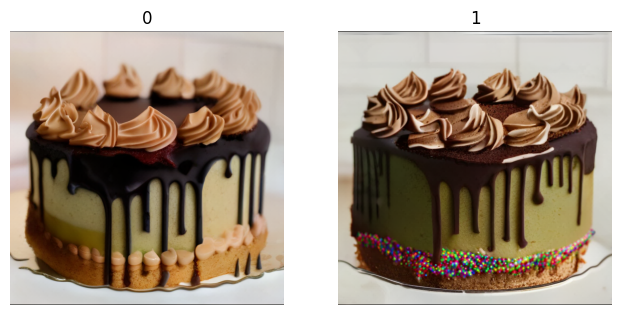

In [ ]:
#@title Click `Show code` in the code cell (Don't forget to run this cell). { display-mode: "form" }

sampleImageSize = '1024' #@param {type:"string"}
sampleCount = 2 #@param {type:"integer"}
prompt = 'A matcha cake' #@param {type:"string"}

# Advanced option, try different the seed numbers
# any random integer number range: (0, 2147483647)
seed = None #@param {type:"raw"}

print('sampleImageSize:', sampleImageSize)
print('sampleCount:', sampleCount)
print('prompt', prompt)
print('seed', seed)
# Use & provide a seed, if possible, so that we can reproduce the results when needed.

# Do it!
try:
  predictions = image_gen_model_editing(prompt, sampleImageSize, sampleCount, str(base64_encoded_image, 'UTF-8'), None, seed)

except Exception as e:
  print(e)
  print("An error occured calling the API.")
  print("1. Check if response was not blocked based on policy violation, check if the UI behaves the same way...")
  print("2. Try a different prompt to see if that was the problem.\n")

#display
display_images_grid(predictions)

## Image Editing, mask based

Copying gs://graeme-dropbox/latte.jpg...
- [1 files][ 72.5 KiB/ 72.5 KiB]                                                
Operation completed over 1 objects/72.5 KiB.                                     
Copying gs://graeme-dropbox/latte_mask.png...
- [1 files][  218.0 B/  218.0 B]                                                
Operation completed over 1 objects/218.0 B.                                      


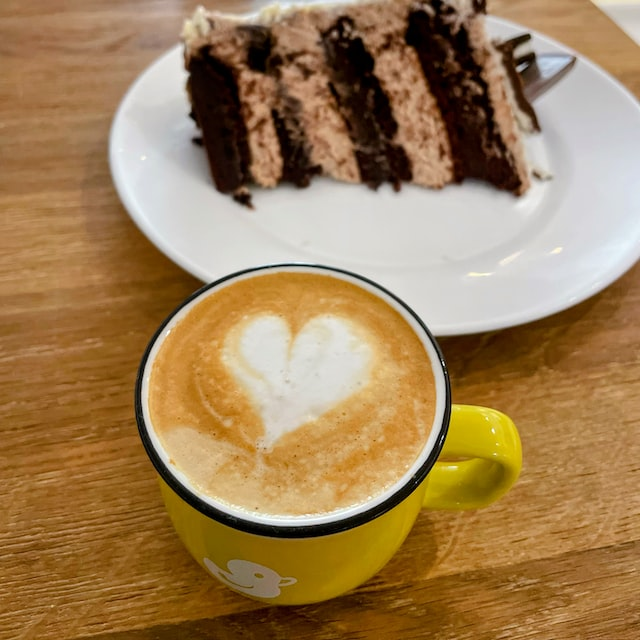

In [ ]:
!gsutil cp gs://graeme-dropbox/latte.jpg .
!gsutil cp gs://graeme-dropbox/latte_mask.png .

filename = 'latte.jpg'
filename_mask = 'latte_mask.png'
from IPython.display import Image

Image(filename=filename, width = 300, height=300)

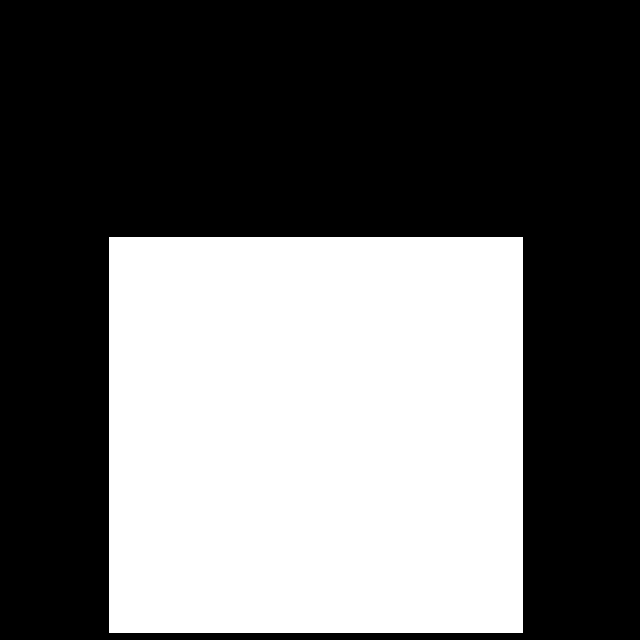

In [ ]:
Image(filename=filename_mask, width = 300, height=300)

In [ ]:
#@title Click `Show code` in the code cell (Don't forget to run this cell). { display-mode: "form" }

sampleImageSize = '1024' #@param {type:"string"}
sampleCount = 2 #@param {type:"integer"}
prompt = 'A cup of tea' #@param {type:"string"}

# Advanced option, try different the seed numbers
# any random integer number range: (0, 2147483647)
seed = None #@param {type:"raw"}

print('sampleImageSize:', sampleImageSize)
print('sampleCount:', sampleCount)
print('prompt', prompt)
print('seed', seed)

base64_encoded_image = encode_image(filename)
base64_encoded_image_mask = encode_image(filename_mask)

# Use & provide a seed, if possible, so that we can reproduce the results when needed.
try:
  predictions = image_gen_model_editing(prompt, sampleImageSize, sampleCount, str(base64_encoded_image, 'UTF-8'), str(base64_encoded_image_mask, 'UTF-8'), seed)

except Exception as e:
  print(e)
  print("An error occured calling the API.")
  print("1. Check if response was not blocked based on policy violation, check if the UI behaves the same way...")
  print("2. Try a different prompt to see if that was the problem.\n")

# Display
display_images_grid(predictions)

## Image Captioning

In [ ]:
def image_caption_model(
    captionCount: int,
    base64_encoded_image
):
  # The AI Platform services require regional API endpoints.
  api_endpoint = f'{REGION}-aiplatform.googleapis.com'
  client_options = {"api_endpoint": api_endpoint}

  # Initialize client that will be used to create and send requests.
  # This client only needs to be created once, and can be reused for multiple requests.
  client = aiplatform.gapic.PredictionServiceClient(
      client_options=client_options
  )

  instance_dict = {
      "image": {"bytesBase64Encoded": base64_encoded_image}
      }

  instance = json_format.ParseDict(instance_dict, Value())
  instances = [instance]

  parameters_dict = {
      "sampleCount": sampleCount
      }

  parameters = json_format.ParseDict(parameters_dict, Value())
  #endpoint = client.endpoint_path(project=project, location=location, endpoint=endpoint_id)
  endpoint = f'projects/{PROJECT_ID}/locations/{REGION}/publishers/google/models/imagetext'

  response = client.predict(
      endpoint=endpoint, instances=instances, parameters=parameters
  )

  predictions = response.predictions
  return predictions


captionCount = 2 #@param {type:"integer"}

# encode the image
base64_encoded_image = encode_image(filename)

try:
  predictions = image_caption_model(captionCount, str(base64_encoded_image, 'UTF-8'))
except Exception as e:
  print(e)
  print("An error occured calling the API.")
  print("1. Check if response was not blocked based on policy violation, check if the UI behaves the same way...")
  print("2. Try a different prompt to see if that was the problem.\n")

#display
print(predictions)

['a cup of cappuccino next to a slice of cake', 'a cup of cappuccino next to a plate of cake']


## Image Q&A

In [ ]:
def image_qanda_model(
    prompt: str,
    answerCount: int,
    base64_encoded_image
):
  # The AI Platform services require regional API endpoints.
  api_endpoint = f'{REGION}-aiplatform.googleapis.com'
  client_options = {"api_endpoint": api_endpoint}

  # Initialize client that will be used to create and send requests.
  # This client only needs to be created once, and can be reused for multiple requests.
  client = aiplatform.gapic.PredictionServiceClient(
      client_options=client_options
  )

  instance_dict = {
      "prompt": prompt,
      "image": {"bytesBase64Encoded": base64_encoded_image}
      }

  instance = json_format.ParseDict(instance_dict, Value())
  instances = [instance]

  parameters_dict = {
      "sampleCount": answerCount
      }

  parameters = json_format.ParseDict(parameters_dict, Value())
  #endpoint = client.endpoint_path(project=project, location=location, endpoint=endpoint_id)
  endpoint = f'projects/{PROJECT_ID}/locations/{REGION}/publishers/google/models/imagetext'

  response = client.predict(
      endpoint=endpoint, instances=instances, parameters=parameters
  )

  predictions = response.predictions
  return predictions


answerCount = 2 #@param {type:"integer"}
prompt = 'What colour is the cup?' #@param {type:"string"}

# base64 encode image
base64_encoded_image = encode_image(filename)

try:
  predictions = image_qanda_model(prompt, answerCount, str(base64_encoded_image, 'UTF-8'))
except Exception as e:
  print(e)
  print("An error occured calling the API.")
  print("1. Check if response was not blocked based on policy violation, check if the UI behaves the same way...")
  print("2. Try a different prompt to see if that was the problem.\n")

#display
print(predictions)

['yellow', 'yellow mug']


# Intuitive Gradio UI Demo

## Function Defs

In [ ]:
from google.colab import auth as google_auth
google_auth.authenticate_user()

In [ ]:
# Using the updated publisher endpoint, updated May '23
ENDPOINT_URL = f'projects/{PROJECT_ID}/locations/{REGION}/publishers/google/models/{IMAGE_MODEL_NAME}'

In [ ]:
def image_gen_model(
    prompt: str,
    sampleImageSize: int,
    sampleCount: int,
    seed=None,
):
  # The AI Platform services require regional API endpoints.
  api_endpoint = f'{REGION}-aiplatform.googleapis.com'
  client_options = {"api_endpoint": api_endpoint}

  # Initialize client that will be used to create and send requests.
  # This client only needs to be created once, and can be reused for multiple requests.
  client = aiplatform.gapic.PredictionServiceClient(
      client_options=client_options
  )
  instance_dict = {"prompt": prompt}
  instance = json_format.ParseDict(instance_dict, Value())
  instances = [instance]

  if seed==None:
    parameters_dict = {
        "sampleImageSize": sampleImageSize,
        "sampleCount": sampleCount,
    }
  else:
    parameters_dict = {
        "sampleImageSize": sampleImageSize,
        "sampleCount": sampleCount,
        "seed": seed
    }

  parameters = json_format.ParseDict(parameters_dict, Value())
  #endpoint = client.endpoint_path(project=project, location=location, endpoint=endpoint_id)
  endpoint = ENDPOINT_URL
  response = client.predict(
      endpoint=endpoint, instances=instances, parameters=parameters
  )
  # print(dir(response))

  predictions = response.predictions
  return predictions

## Demo

In [ ]:
import gradio as gr
import base64
import numpy as np
import cv2
import math
from matplotlib import pyplot as plt
import requests

def update(image_prompt,
           sampleImageSize='1024',
           sampleCount=6,
           seed=None):

    sampleImageSize = sampleImageSize # '1024'
    sampleCount = sampleImageSize # 6
    image_prompt = image_prompt

    # Advanced option, try different the seed numbers
    # any random integer number range: (0, 2147483647)
    if seed < 0 or seed > 2147483647:
      seed = None
    else:
      seed = seed

    # Use & provide a seed, if possible, so that we can reproduce the results when needed.
    img_array = []
    try:
      predictions = image_gen_model(image_prompt, sampleImageSize, sampleCount, seed)

      for index, result in enumerate(predictions):
        img_str = result._pb['bytesBase64Encoded'].SerializeToString()
        img_b64 = img_str[4:]
        im_bytes = base64.b64decode(img_b64)
        im_arr = np.frombuffer(im_bytes, dtype=np.uint8)  # one-dim Numpy array
        img = cv2.imdecode(im_arr, flags=cv2.IMREAD_COLOR)
        img_array.append(img)

    except Exception as e:
      print(e)
      print("An error occured calling the API.")
      print("1. Check if response was not blocked based on policy violation, check if the UI behaves the same way...")
      print("2. Try a different prompt to see if that was the problem.\n")

    return img_array

In [ ]:
# https://gradio.app/docs/#gallery
iface = gr.Interface(fn=update,
                     inputs=[
                         gr.Textbox(placeholder="Try: A line drawing of a duck boat tour in Boston, with a colorful background of the city.", label="Image Prompt", value='A line drawing of a duck boat tour in Boston, with a colorful background of the city.'),
                         gr.Dropdown(label='ImageSize', choices=['256', '1024'], value='1024'), # gr.Textbox(label='sampleImageSize', value='1024'),
                         gr.Number(label='sampleCount', value=6),
                         gr.Number(label='seed',info='Use & provide a seed, if possible, so that we can reproduce the results when needed. Integer number range: (0, 2147483647)', value=-1)
                         ],
                     outputs=[
                         gr.Gallery(label="Generated images", show_label=False, elem_id="gallery").style(columns=[3], rows=[2], object_fit='contain', height='auto')
                         ],
                     title='Image Gen',
                     description='Image generation from a prompt.',
                     allow_flagging=False,
                     theme=gr.themes.Soft()
                     )

# Set debug=True in Colab for live debugging
# iface.launch(share=True)
# iface.launch(share=True, debug=True)
iface.launch(debug=True)

<ipython-input-37-f2a28a2a78be>:10: GradioDeprecationWarning: The `style` method is deprecated. Please set these arguments in the constructor instead.
  gr.Gallery(label="Generated images", show_label=False, elem_id="gallery").style(columns=[3], rows=[2], object_fit='contain', height='auto')
/usr/local/lib/python3.10/dist-packages/gradio/interface.py:331: UserWarning: The `allow_flagging` parameter in `Interface` nowtakes a string value ('auto', 'manual', or 'never'), not a boolean. Setting parameter to: 'never'.
  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Keyboard interruption in main thread... closing server.
